# Setting up environment

In [335]:
import numpy as np
import pandas as pd
from nsepy import get_history
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline

# Getting data using NSEpy

In [336]:
tcs = get_history(symbol="TCS", start=date(2015,1,1), end=date(2016,12,31))
infy = get_history(symbol="INFY", start=date(2015,1,1), end=date(2016,12,31))
nifty = get_history(symbol="NIFTY IT", start=date(2015,1,1), end=date(2016,12,31),index=True)

# Fetching needed data

In [337]:
tcs_close = pd.DataFrame(tcs.Close)
infy_close = pd.DataFrame(infy.Close)
nifty_close = pd.DataFrame(nifty.Close)

# Function to calclulate MA for 4,16...52 weeks 

In [345]:
weeks = [28,112,196,280,364]
MA_tcs = {}
MA_infy = {}
MA_nifty = {}
for i in range(5):
    MA_tcs[i] = movingaverage(tcs_close.Close,weeks[i])
    MA_infy[i] = movingaverage(infy_close.Close,weeks[i])
    MA_nifty[i] = movingaverage(nifty_close.Close,weeks[i])
    
  
   

In [338]:
def movingaverage(values, window):
    weights = np.repeat(1.0,window)/window
    MA = np.convolve(values,weights)
    return MA

# Funtion to calculate MA with unequal time series due to stock market holidays

In [340]:
def rollingwindow(values,w):
    SMA = values.rolling(w).mean().shift()
    return SMA
    

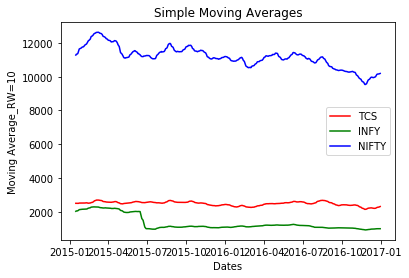

In [344]:

tcs_close["MA_10"] = rollingwindow(tcs_close.Close,10)
infy_close["MA_10"] = rollingwindow(infy_close.Close,10)
nifty_close["MA_10"] = rollingwindow(nifty_close.Close,10) 
plt.plot(tcs_close["MA_10"], color = "red", label = 'TCS')
plt.plot(infy_close["MA_10"], color = "green", label = 'INFY')
plt.plot(nifty_close["MA_10"], color = "blue", label = 'NIFTY')
plt.xlabel('Dates')
plt.ylabel('Moving Average_RW=10')
plt.title('Simple Moving Averages')
plt.legend()
plt.show()